In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [69]:
#readingbthe dataset

In [2]:
df=pd.read_csv(r'C:\Users\Kingsman\Downloads\titanic_dataset.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
#preprocessing

In [5]:
df.shape

(891, 12)

In [6]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df['Survived'].value_counts(normalize=True)#to get percentage of values in of target column

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df['Age'].fillna(df['Age'].median(),inplace=True)#filling missing values

In [11]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [12]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

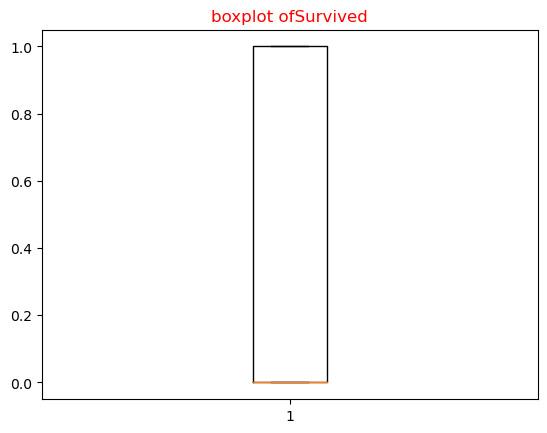

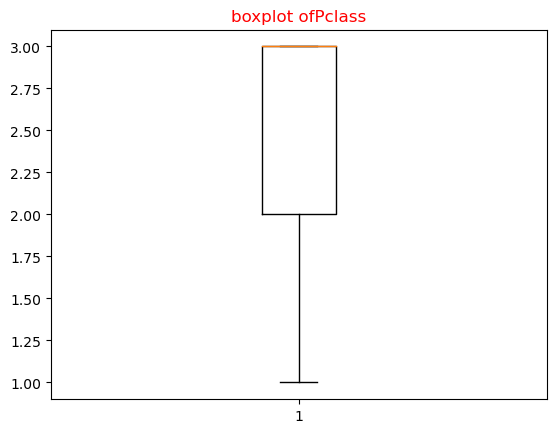

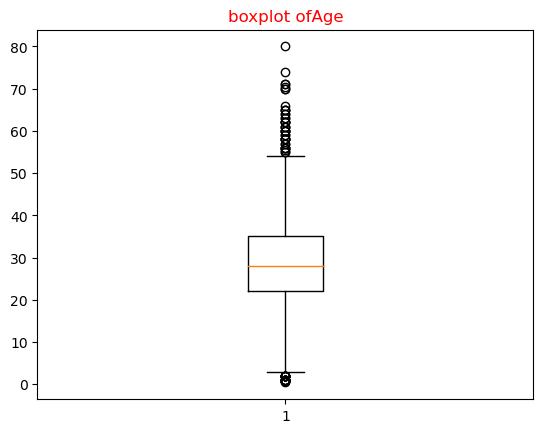

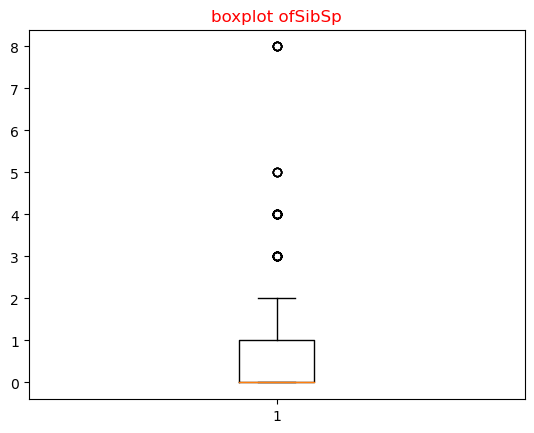

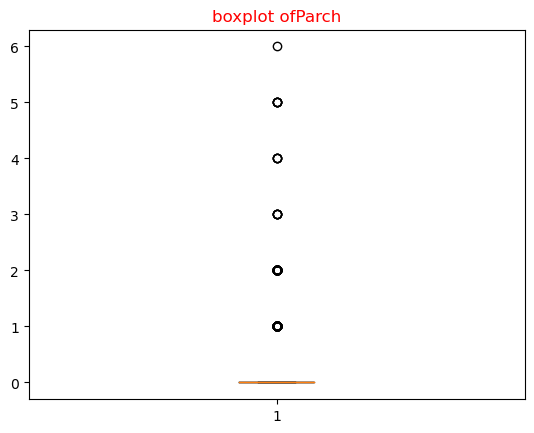

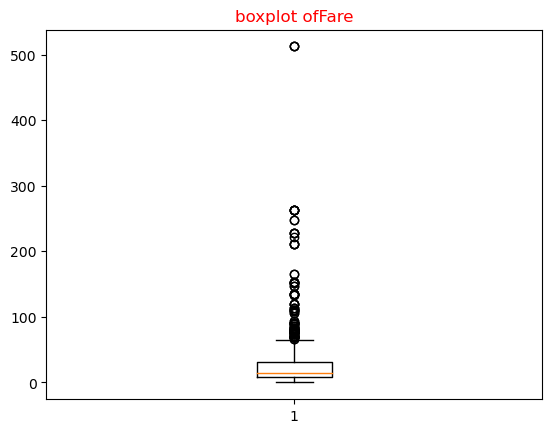

In [14]:
nums_column=df.select_dtypes(include=['float64','int'])
for k in nums_column:
    plt.figure()
    plt.boxplot(df[k])
    plt.title('boxplot of{}'.format(k),color='r')
    plt.show()

In [15]:
Q1=df['SibSp'].quantile(0.25)
Q3=df['SibSp'].quantile(0.75)
IQR=Q3-Q1
up_lim=Q3+1.5*IQR
l_lim=Q1-1.5*IQR
outliers=[]
for x in df['SibSp']:
    if(x>up_lim) or (x<l_lim):
        outliers.append(x)
len(outliers)  

46

In [16]:
df['SibSp']=np.where(df['SibSp']>up_lim, up_lim, np.where(df['SibSp']<l_lim, l_lim, df['SibSp']))#handling outliers

In [17]:
Qu1=df['Age'].quantile(0.25)
Qu3=df['Age'].quantile(0.75)
IQR=Q3-Q1
u_lim=Qu3+1.5*IQR
li_lim=Qu1-1.5*IQR
outliers=[]
for x in df['Age']:
    if(x>u_lim) or (x<li_lim):
        outliers.append(x)
len(outliers)  

373

In [18]:
df['Age']=np.where(df['Age']>u_lim, u_lim, np.where(df['Age']<li_lim, li_lim, df['Age']))#handling outliers

In [19]:
Que1=df['Parch'].quantile(0.25)
Que3=df['Parch'].quantile(0.75)
IQR=Q3-Q1
upp_lim=Que3+1.5*IQR
lii_lim=Que1-1.5*IQR
outliers=[]
for x in df['Parch']:
    if(x>upp_lim) or (x<lii_lim):
        outliers.append(x)
len(outliers)  

95

In [20]:
df['Parch']=np.where(df['Parch']>upp_lim, upp_lim, np.where(df['Parch']<lii_lim, lii_lim, df['Parch']))#handling outliers

In [21]:
Qua1=df['Fare'].quantile(0.25)
Qua3=df['Fare'].quantile(0.75)
IQR=Q3-Q1
upi_lim=Qua3+1.5*IQR
liip_lim=Qua1-1.5*IQR
outliers=[]
for x in df['Fare']:
    if(x>upi_lim) or (x<liip_lim):
        outliers.append(x)
len(outliers)  

227

In [22]:
df['Fare']=np.where(df['Fare']>upi_lim, upi_lim, np.where(df['Fare']<liip_lim, liip_lim, df['Fare']))#handling outliers

In [23]:
data1 = pd.get_dummies(df)

In [24]:
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1.0,0.0,7.250,0,1,0,0,1
1,1,1,36.5,1.0,0.0,32.500,1,0,1,0,0
2,1,3,26.0,0.0,0.0,7.925,1,0,0,0,1
3,1,1,35.0,1.0,0.0,32.500,1,0,0,0,1
4,0,3,35.0,0.0,0.0,8.050,0,1,0,0,1


In [25]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.373737,0.426487,0.292368,18.304596
std,0.486592,0.836071,5.928748,0.708246,0.535890,10.404011
min,0.000000,1.000000,20.500000,0.000000,0.000000,6.410400
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,36.500000,2.500000,1.500000,32.500000


In [26]:
#splitting data to afeature and target

In [27]:
x=data1.drop(['Survived'],axis=1) #independent variables
y=data1['Survived']#dependent variable or target variable

training the data

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# k-NN classification

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [33]:
from sklearn.neighbors import KNeighborsClassifier
metric=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

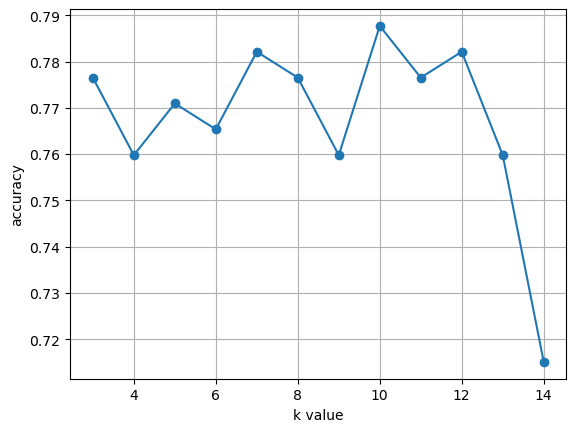

In [34]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [35]:
 classifier= KNeighborsClassifier(n_neighbors= 5, metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn=classifier.predict(x_test)
    

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='micro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='micro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='micro'))

Accuracy =  0.770949720670391
precision =  0.770949720670391
Recall =  0.770949720670391
f1 score = 0.770949720670391


In [37]:
confusion_matrix(y_test,y_pred_knn)

array([[89, 16],
       [25, 49]], dtype=int64)

# SVM Model

In [38]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train, y_train)

SVC(kernel='linear')

In [39]:
y_pred = svmclf.predict(x_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy =', accuracy_score(y_test, y_pred))

Accuracy = 0.7821229050279329


In [41]:
confusion_matrix(y_test, y_pred)

array([[88, 17],
       [22, 52]], dtype=int64)

In [42]:
from sklearn.model_selection import KFold
kfold_vldr = KFold(5)

In [43]:
for train_index, test_index in kfold_vldr.split(x,y):
    print('Training Index:\n', train_index)
    print('Testing Index:\n', test_index)

Training Index:
 [179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 4

In [44]:
#from sklearn.model_selection import cross_val_score

In [45]:
#cv_result = cross_val_score(knn, x, y, cv = kfold(n_splits=k))
#cv_result

In [46]:
#np.mean(cv_result)

In [47]:
from sklearn.model_selection import StratifiedKFold
skfold_vldr = StratifiedKFold(n_splits = 5)

In [48]:
for train_index, test_index in skfold_vldr.split(x,y):
    print('Training Index:\n', train_index)
    print('Testing Index:\n', test_index)

Training Index:
 [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 4

In [49]:
knn= KNeighborsClassifier()
svm=SVC()

# comparing the models

In [50]:
from sklearn.model_selection import cross_val_score

In [55]:
cv_result1 = cross_val_score(knn, x, y, cv = KFold(n_splits=5))
cv_result2 = cross_val_score(svm, x, y, cv = KFold(n_splits=5))

In [61]:
average_accuracy_knn=cv_result1.mean()
average_accuracy_svm=cv_result2.mean()

In [62]:
cv_result1.mean()
cv_result2.mean()

0.6780177013370159

In [66]:
cv_stra_resul1 = cross_val_score(knn, x, y, cv = StratifiedKFold(n_splits=5))
cv_stra_resul2 = cross_val_score(knn, x, y, cv = StratifiedKFold(n_splits=5))

In [67]:
average_accuracy_knn=cv_stra_resul1.mean()
average_accuracy_svm=cv_stra_resul2.mean()

In [68]:
cv_stra_resul1
cv_stra_resul2

array([0.68715084, 0.74157303, 0.73595506, 0.74719101, 0.76404494])